In [1]:
import xml.etree.ElementTree as ET
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re

In [2]:
def getallcomments(root):
    categories = {}
    for node in root:
        url = node.find('url')
        categorie = url.text.split("/")[3]
        if categories.get(categorie) is None:
            categories[categorie] = 1
        else:
            categories[categorie] = int(categories[categorie]) + 1
        comments = node.find('comments')
        all_comments = ""
        for value in comments:
            all_comments += "\n" + value.text
        f = open(categorie + ".txt", "a", encoding="utf-8")
        f.write(all_comments)
        f.close()
    return categories

In [3]:
def normalize_data(categories, number_of_word=15):
    most_occurs = dict()
    
    # remove stopwords arabic,french,english using NLTK
    stopwords = list()
    arab_stopwords = sw.words("arabic")
    arab_stopwords.extend(["و","ان","الى","او"])
    stopwords.extend(arab_stopwords)
    stopwords.extend(sw.words("french"))
    stopwords.extend(sw.words("english"))
    
    # Lemmatization using NLTK
    lemmatizer = WordNetLemmatizer()
    
    for categorie in categories:
        with open(categorie + '.txt','r',encoding="utf-8") as f:
            text = f.read();
            
            # Convert text to lowercase
            text = text.lower()

            # Remove whitespaces
            text = text.strip()

            # Remove numbers
            text = re.sub(r"\d+", "", text)

            # Remove punctuation: [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]
            text = re.sub(r"[\\!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]", "", text)
            text = re.sub("\W+"," ",text)

            # tokenization
            text = text.split()

            # remove stopwords arabic,french,english
            text = [word for word in text if word not in (stopword.lower() for stopword in stopwords)]

            # Lemmatization
            text = [lemmatizer.lemmatize(word) for word in text]

            # to get most frequent word in text
            counter = Counter(text)
            most_occur = counter.most_common(number_of_word)
            
            out = ""
            for occ in most_occur:
                for i in range(occ[1]):
                    out += occ[0] + " "
            
            most_occurs[categorie] = out
        
    return most_occurs

In [4]:
from wordcloud import WordCloud, STOPWORDS
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

def make_wordcloud(data,title):
    reshaped_text = arabic_reshaper.reshape(data)
    artext = get_display(reshaped_text)

    wordcloud = WordCloud(font_path='arial', 
                          width = 3000, 
                          height = 2000,
                          background_color = 'white',
                          stopwords = STOPWORDS).generate(artext)
    
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

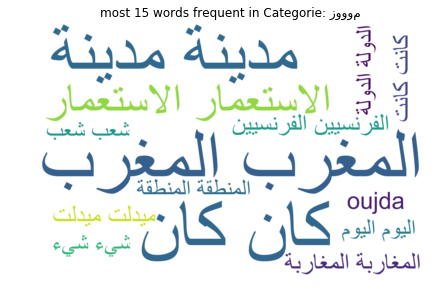

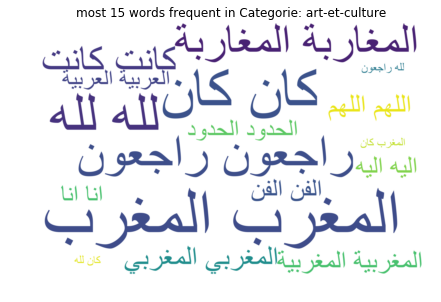

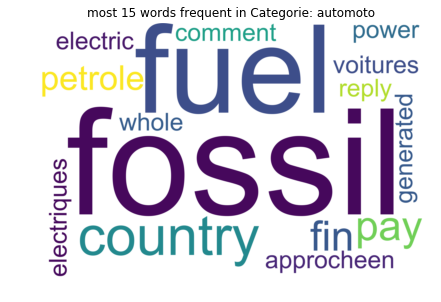

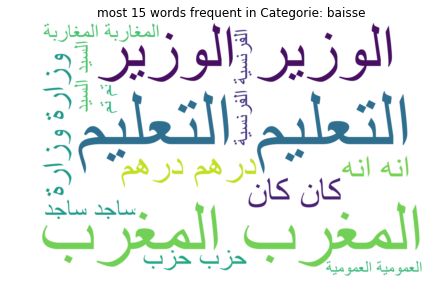

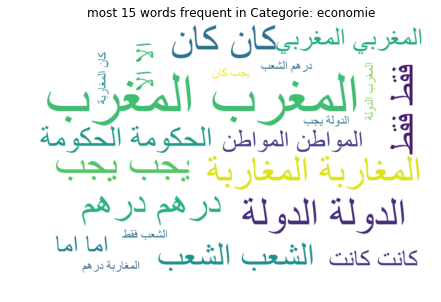

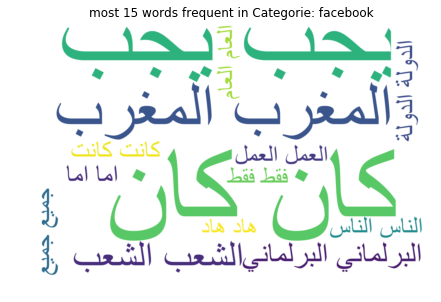

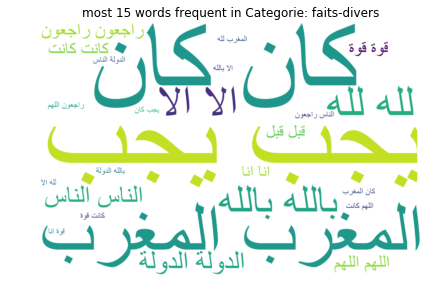

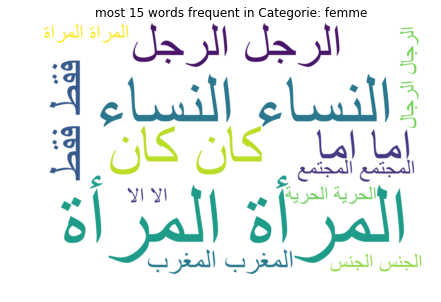

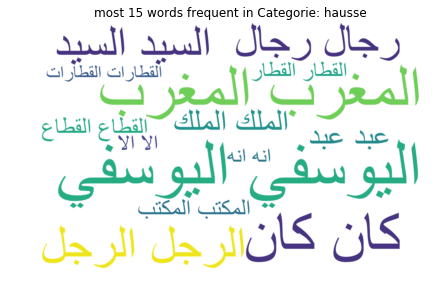

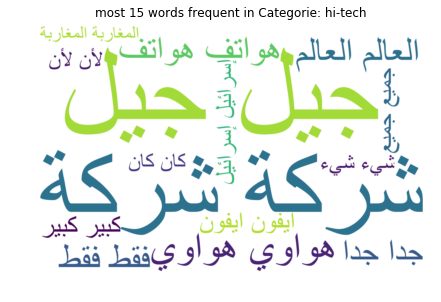

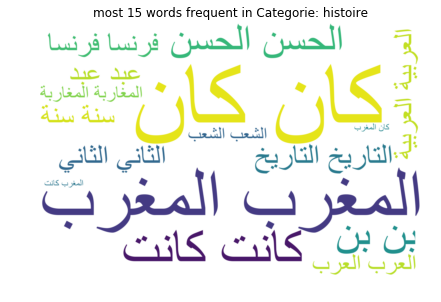

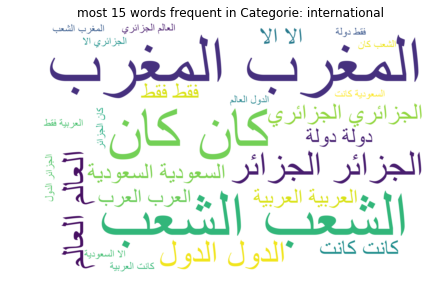

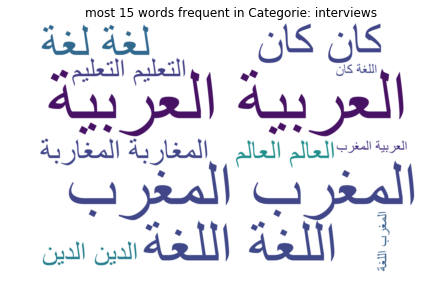

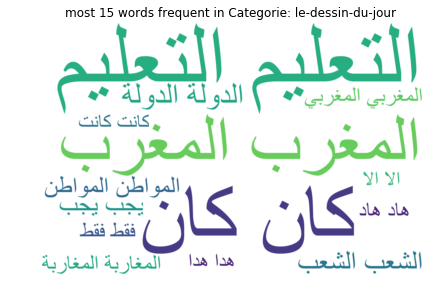

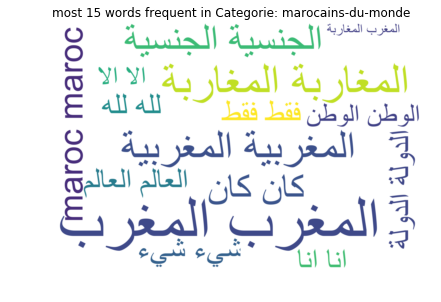

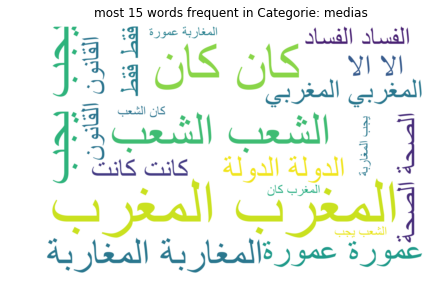

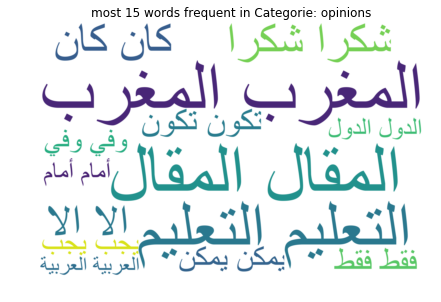

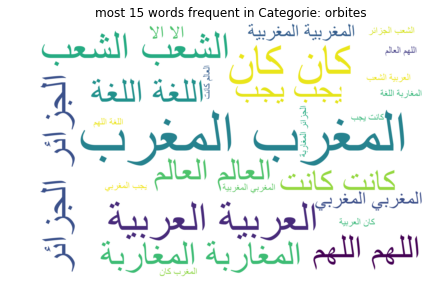

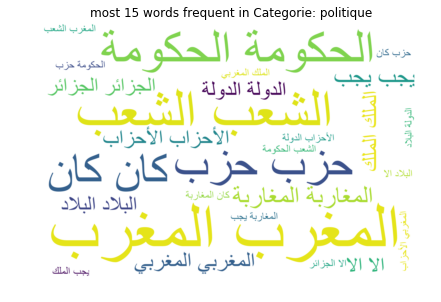

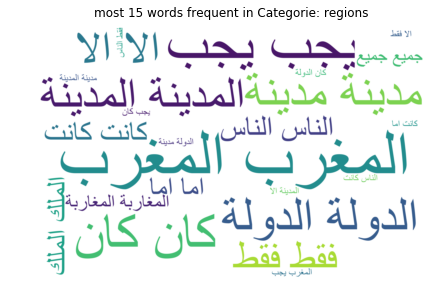

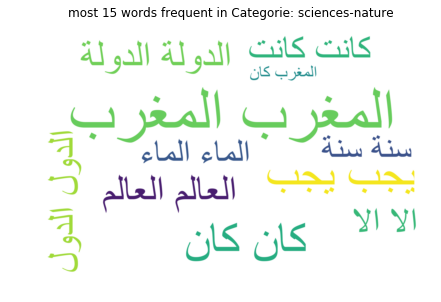

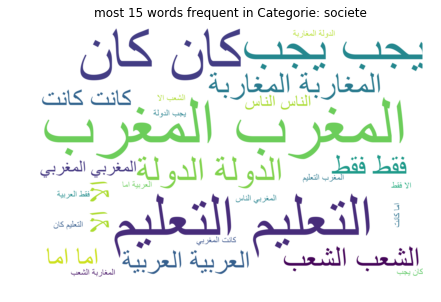

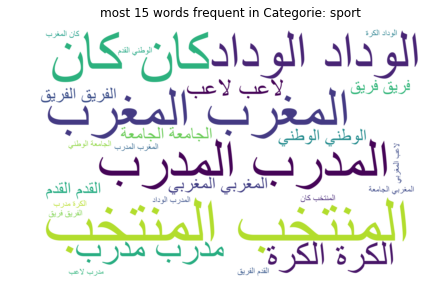

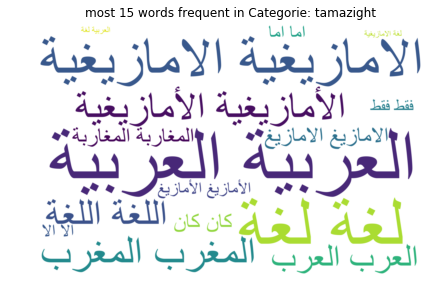

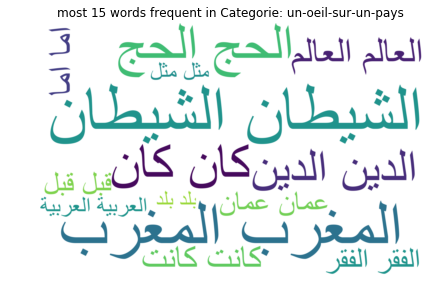

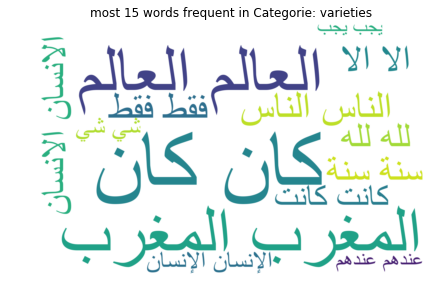

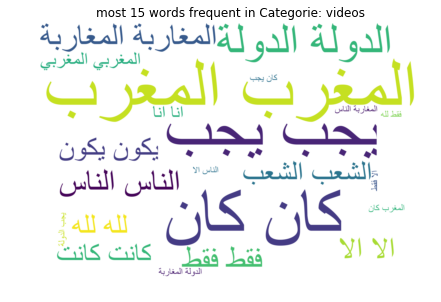

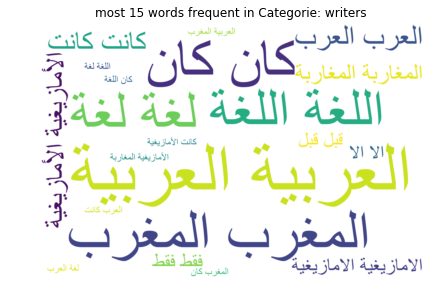

In [5]:
# root = ET.parse('dataset.xml').getroot()
# categories = getallcomments(root)

categories = {'زوووم': 2, 'art-et-culture': 201, 'automoto': 8, 'baisse': 4, 'economie': 227, 'facebook': 16, 'faits-divers': 620, 'femme': 19, 'hausse': 4, 'hi-tech': 13, 'histoire': 35, 'international': 679, 'interviews': 14, 'le-dessin-du-jour': 65, 'marocains-du-monde': 36, 'medias': 102, 'opinions': 96, 'orbites': 153, 'politique': 186, 'regions': 636, 'sciences-nature': 113, 'societe': 500, 'sport': 443, 'tamazight': 17, 'un-oeil-sur-un-pays': 14, 'varieties': 259, 'videos': 578, 'writers': 318}
data = normalize_data(categories)

for cat in data:
    make_wordcloud(data[cat],"most 15 words frequent in Categorie: " + cat)